In [105]:
# Copyright (c) https://albara.ramli.net
# This code is authored by Albara Ah Ramli
# All rights reserved.

# If you use this code, please cite the following paper:
# @misc{ramli2023walk4me,
#     title={Walk4Me: Telehealth Community Mobility Assessment, An Automated System for Early Diagnosis and Disease Progression},
#     author={Albara Ah Ramli and Xin Liu and Erik K. Henricson},
#     year={2023},
#     eprint={2305.05543},
#     archivePrefix={arXiv},
#     primaryClass={eess.SP}
# }



# Importing necessary libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import warnings

# Suppressing warnings
warnings.filterwarnings("ignore")

# Function to flip a binary bit
def flip(bit):
    return '1' if bit == '0' else '0'

# Function to compute the two's complement of a binary number
def scom(binary_str):
    # Compute the one's complement
    ones = ''.join(flip(bit) for bit in binary_str)
    twos = list(ones)

    # Compute the two's complement
    for i in range(len(binary_str) - 1, -1, -1):
        if ones[i] == '1':
            twos[i] = '0'
        else:
            twos[i] = '1'
            break

    # If all bits were '1', insert an additional '1' at the beginning
    if i == -1:
        twos.insert(0, '1')

    return ''.join(twos)

def hp3_read(url):
  results=[]
  print_out=0
  f = open(url, "r")
  i=0
  for x in f:
    x=x.replace("\n","")
    i=i+1
    if i==19:
      x=x.replace("<calibration_order>","")
      if print_out==1:
        print("***************************************")
      calibration_order=x.split(",")
      if print_out==1:
        print(calibration_order)
    if i==20:
      x=x.replace("<calibration_data>","")
      #print(x)
      calibration_data=x.split(",")
      if print_out==1:
        print(calibration_data)
        print("***************************************")
    if i==21:
      calibration={}
      n=0
      for calibration_i in calibration_order:
        calibration[calibration_i]=int(calibration_data[n])
        n=n+1
    ################################################################################
    ################################################################################
    ################################################################################
    TTT=23
    if (i==TTT) or (i>TTT and (i%3)==2):
      x=x.replace("\n","").replace("N:","").split("_")
      index=x[0]
      #print("",index)
      millesecond=int(x[1][0:2], 16)
      seconds=int(x[1][2:5], 16)
      timex=str(seconds)+"."+str(millesecond)
      #print(timex)
    ################################################################################
    ################################################################################
    ################################################################################
    if i>=TTT+1 and (i>TTT+1 and (i%3)!=2):
      #x="R1094F90C73A30E75A703FFAB"
      #x="L1181AD039DDA0F5846"
      #x="R6BA577563257574EBE57F15DFFFD4857260800B7A0"
      side=x[0:1]
      if print_out==1:
        print("===========================")
        print(x)
        print("===========================")
      l=6
      a=1
      b=a+l
      for x_i in range(1,7+1):
        ori="*"
        if print_out==1:
          print("Hexa=",x[a:b])
        out=""
        out=out+"{0:04b}".format(int(x[a+0:a+1], 16))
        out=out+"{0:04b}".format(int(x[a+1:a+2], 16))
        out=out+"{0:04b}".format(int(x[a+2:a+3], 16))
        out=out+"{0:04b}".format(int(x[a+3:a+4], 16))
        out=out+"{0:04b}".format(int(x[a+4:a+5], 16))
        out=out+"{0:04b}".format(int(x[a+5:a+6], 16))
        #print("Binary=",out)
        value=int(out, 2)
        if print_out==1:
          print("Int=",value)
        outx=scom(out.strip(""))
        outx=''.join(outx)
        #print("2nd complements = ",outx)
        #print("20 bit acc=",outx[0:20])
        #print("4bit remains=",outx[20:24])
        a=b
        b=a+l
        if x_i==1:
          if print_out==1:
            print("(x-axis) Vertical acceleration")
          ori="X"
          value_x=value
        if x_i==2:
          if print_out==1:
            print("(y-axis) Anterior-Posterior acceleration")
          ori="Y"
          value_y=value
        if x_i==3:
          if print_out==1:
            print("(z-axis) Lateral acceleration")
          ori="Z"
          value_z=value
        if ori!="*":
          if side=="R" and ori=="X":
            vmax_name=side+ori+"_MAX"
          else:
            vmax_name=side+ori+"_max"
          vmax_value=calibration[vmax_name]
          if print_out==1:
            print(vmax_name,vmax_value)
        if x_i==4:
          if print_out==1:
            print("ECG")
          ecg=value
        if x_i==5:
          if print_out==1:
            print("PPG")
          ppg=value
        if x_i==6:
          if print_out==1:
            print("Vref from left ADC")
          vref=value
          if side=="L":
            acc_x=(value_x-vref)/calibration[side+'X_max']
          else:
            acc_x=(value_x-vref)/calibration[side+'X_MAX']
          acc_y=(value_y-vref)/calibration[side+'Y_max']
          acc_z=(value_z-vref)/calibration[side+'Z_max']
          ecg_value=(ecg-vref)
          if print_out==1:
            print("Vref=",value)
          if print_out==1:
            print("INDEX=",index," Time=",timex," Side=",side," Acc_X=",acc_x," Acc_Y=",acc_y," Acc_Z=",acc_z," PPG=",ppg," ECG=",ecg)
          results.append([index,timex,side,acc_x,acc_y,acc_z,ppg,ecg_value])
        if x_i==7:
          if x[0:1]=="L":
            if print_out==1:
              print("Battery level")
          if x[0:1]=="R":
            if print_out==1:
              print("Square wave for time calibration")
        if print_out==1:
          print("====================================")
  #######################
  df=pd.DataFrame(results,columns=["index","time","side","acc_x","acc_y","acc_z","ppg","ecg"])
  #df['index2']=df['index']
  #df=df.set_index('index')
  #df=df.set_index('index')
  #df=df.sort_values(by=['timex'])
  iii=0
  ########################
  df["time"]=df["time"].astype(float)
  df["acc_x"]=df["acc_x"].astype(float)
  df["acc_y"]=df["acc_y"].astype(float)
  df["acc_z"]=df["acc_z"].astype(float)
  df["ppg"]=df["ppg"].astype(float)
  df["ecg"]=df["ecg"].astype(float)
  df["index"]=df["index"].astype(int)
  df=df.sort_values(by=['index'], ascending=True)
  df.reset_index(drop=True, inplace=True)
  ############
  # Calculate the time range
  time_diff_sec = 1 / 250
  # Calculate the total number of samples
  total_samples = len(df)
  # Create the time column
  df['time'] = pd.date_range(start='2024-01-01', periods=total_samples, freq=f'{time_diff_sec}S').time
  ###########
  return df

def hp4_read(url):
  results=[]
  print_out=0
  f = open(url, "r")
  i=0
  for x in f:
    x=x.replace("\n","")
    i=i+1
    ################################################################################
    ################################################################################
    ################################################################################
    TTT=20
    if (i==TTT) or (i>TTT and (i%3)==2):
      x=x.replace("\n","").replace("N:","")
      index=x
      timex=x
      if print_out==1:
        print("",index)
    ################################################################################
    ################################################################################
    ################################################################################
    if i>=TTT+1 and (i>TTT+1 and (i%3)!=2):
      #x="R1094F90C73A30E75A703FFAB"
      #x="L1181AD039DDA0F5846"
      #x="R6BA577563257574EBE57F15DFFFD4857260800B7A0"
      side=x[0:1]
      if print_out==1:
        print("===========================")
        print(x)
        print("===========================")
      l=6
      a=1
      b=a+l
      if side=="R":
        sec=4
      else:
        sec=3
        ecg=0
      for x_i in range(1,sec+1):
        ori="*"
        if print_out==1:
          print("Hexa=",x[a:b])
        out=""
        out=out+"{0:04b}".format(int(x[a+0:a+1], 16))
        out=out+"{0:04b}".format(int(x[a+1:a+2], 16))
        out=out+"{0:04b}".format(int(x[a+2:a+3], 16))
        out=out+"{0:04b}".format(int(x[a+3:a+4], 16))
        out=out+"{0:04b}".format(int(x[a+4:a+5], 16))
        out=out+"{0:04b}".format(int(x[a+5:a+6], 16))
        #print("Binary=",out)
        value=int(out, 2)
        if print_out==1:
          print("Int=",value)
        outx=scom(out.strip(""))
        outx=''.join(outx)
        #print("2nd complements = ",outx)
        #print("20 bit acc=",outx[0:20])
        #print("4bit remains=",outx[20:24])
        a=b
        b=a+l
        if x_i==1:
          if print_out==1:
            print("(x-axis) Vertical acceleration")
          ori="X"
          acc_x=value
        if x_i==2:
          if print_out==1:
            print("(y-axis) Anterior-Posterior acceleration")
          ori="Y"
          acc_y=value
        if x_i==3:
          if print_out==1:
            print("(z-axis) Lateral acceleration")
          ori="Z"
          acc_z=value
        if x_i==4:
          if print_out==1:
            print("ECG")
          ecg=value
      if print_out==1:
        print("INDEX=",index," Time=",timex," Side=",side," Acc_X=",acc_x," Acc_Y=",acc_y," Acc_Z=",acc_z," ECG=",ecg)
      results.append([index,timex,side,acc_x,acc_y,acc_z,ecg])
  #######################
  df=pd.DataFrame(results,columns=["index","time","side","acc_x","acc_y","acc_z","ecg"])
  #df['index2']=df['index']
  #df=df.set_index('index')
  #df=df.set_index('index')
  #df=df.sort_values(by=['timex'])
  iii=0
  ########################
  df["time"]=df["time"].astype(float)
  df["acc_x"]=df["acc_x"].astype(float)
  df["acc_y"]=df["acc_y"].astype(float)
  df["acc_z"]=df["acc_z"].astype(float)
  df["ecg"]=df["ecg"].astype(float)
  df["index"]=df["index"].astype(int)
  df=df.sort_values(by=['index'], ascending=True)
  df.reset_index(drop=True, inplace=True)
  ############
  # Calculate the time range
  time_diff_sec = 1 / 250
  # Calculate the total number of samples
  total_samples = len(df)
  # Create the time column
  df['time'] = pd.date_range(start='2024-01-01', periods=total_samples, freq=f'{time_diff_sec}S').time
  ###########
  return df

def hp_read(url):
  # Split the filename and extension
  filename, extension = os.path.splitext(url)
  extension=extension.lower()[1:]
  # Check if the extension matches hp4
  if extension == "hp4":
    # Call hp4_read function
    return hp4_read(url), extension
    # Check if the extension matches hp3
  elif extension == "hp3":
    # Call hp3_read function
    return hp3_read(url), extension
  else:
    # Print error message for unsupported file extensions
    print(f"Error: '{extension}' is not supported! The file extension should be either '.hp3' or '.hp4'")
    return None, extension

# Function to remove drift in the data for a single axis
def hp_remove_drift_single(zzz, letx, extension, base):
    # Create a copy of the DataFrame
    xxx = zzz.copy()

    # Calculate the rolling mean (trend) of acceleration data for the specified axis
    trend = zzz["acc_" + letx].rolling(base).mean().to_frame()
    trend.columns = ["trend_" + letx]  # Rename the column to indicate it's the trend
    trend.reset_index(drop=True, inplace=True)  # Reset index for alignment

    # Reset index of the original DataFrame for alignment
    xxx.reset_index(drop=True, inplace=True)

    # Add trend and new acceleration data columns to the DataFrame
    xxx["trend_" + letx] = trend["trend_" + letx]
    xxx["new_acc_" + letx] = xxx["acc_" + letx] - trend["trend_" + letx]

    if extension == "hp4":
        xxx["new_acc_" + letx] /= 2**18

    return xxx


# Function to remove drift in the data for all three axes
# base is the number of data points used in each rolling window to compute the mean.
def hp_remove_drift(zzz, extension, base):
    # Iterate over each axis (x, y, z)
    for axis in ["x", "y", "z"]:
        # Call hp_remove_drift_single to remove drift for the current axis
        zzz = hp_remove_drift_single(zzz, axis, extension, base)
    return zzz


# Function to draw the original, trend, and new acceleration data before and after removing drift
def draw_drift(out):
    # Define colors for each axis
    colors = {"x": "blue", "y": "orange", "z": "green"}

    # Iterate over each axis (x, y, z)
    for axis in ["x", "y", "z"]:
        # Print axis information
        print(f"{axis}-axis before and after")

        # Create subplots for original, trend, and new acceleration data
        fig, ax = plt.subplots(nrows=2, figsize=(22, 6))

        # Plot original and trend data
        out.plot(x="index", y=[f"acc_{axis}", f"trend_{axis}"], ax=ax[0], color=[colors[axis], 'red'])
        ax[0].set_title("Original and Trend Data")
        ax[0].legend([f"acc_{axis}", f"trend_{axis}"])

        # Plot new acceleration data
        out.plot(x="index", y=f"new_acc_{axis}", ax=ax[1], color=colors[axis])
        ax[1].set_title("New Acceleration Data")
        ax[1].legend([f"new_acc_{axis}"])

        # Add vertical space between subplots
        plt.subplots_adjust(hspace=0.5)

        # Display the plots
        plt.show()

## **Reading and Displaying the Contents of an HP3 or HP4 File**

In [106]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import os

# Import the hp3_read function from the hp3 module
#from hp3 import *

# Specify the URL or path to the HP3 file
url = "file.hp3"
#url = "file.hp4"

# Read the HP3 file and extract the data
data, extension = hp_read(url)

# Display the data
display(data)


,index,time,side,acc_x,acc_y,acc_z,ppg,ecg
0,251,00:00:00,R,0.122135,0.095760,0.046530,16776381.0,-107161.0
1,252,00:00:00.004000,L,0.126298,-0.101215,0.038709,16776419.0,-134806.0
2,252,00:00:00.008000,R,0.121962,0.095923,0.047582,16776389.0,-130599.0
3,253,00:00:00.012000,L,0.125942,-0.100518,0.038802,16776425.0,-125262.0
4,253,00:00:00.016000,R,0.122511,0.095472,0.046868,16776398.0,-115873.0
...,...,...,...,...,...,...,...,...
71494,35998,00:04:45.976000,R,0.119487,0.095364,0.049709,16776399.0,1342598.0
71495,35999,00:04:45.980000,L,0.126905,-0.103327,0.036284,16776407.0,-319993.0
71496,35999,00:04:45.984000,R,0.119425,0.095610,0.049395,16776389.0,-803057.0
71497,36000,00:04:45.988000,L,0.126711,-0.103122,0.035144,16776417.0,-1530059.0


# **Splitting Data into Left and Right Sides**

In [107]:
# For example, splitting data into left and right sides
left_data = data[data['side'] == "L"]
right_data = data[data['side'] == "R"]

# **Draw the Acceleration Signal, PPG, and ECG of the Left and Right Sides**


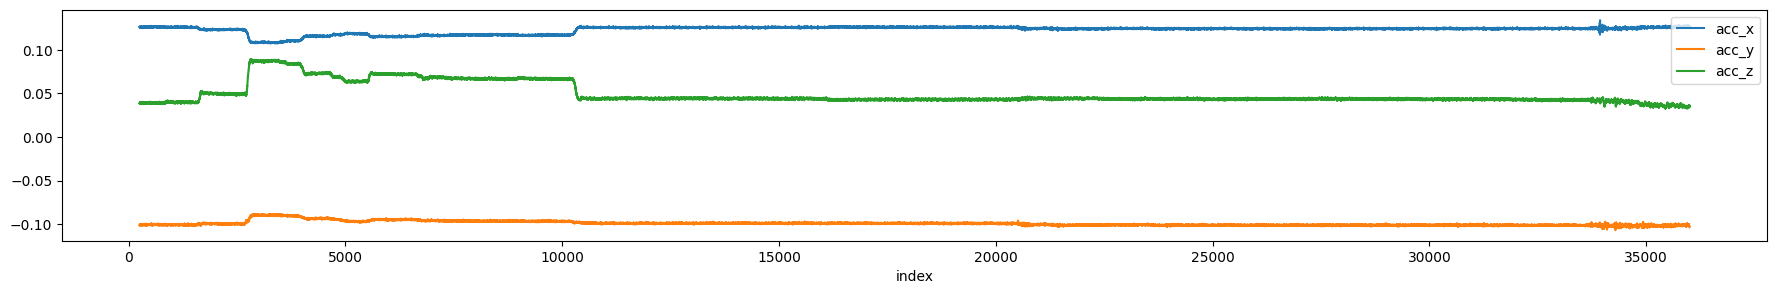

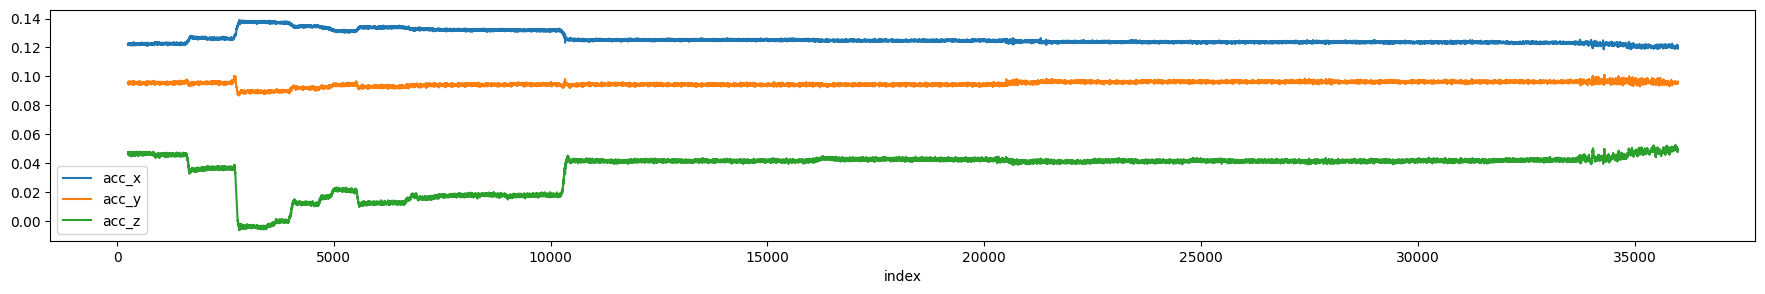

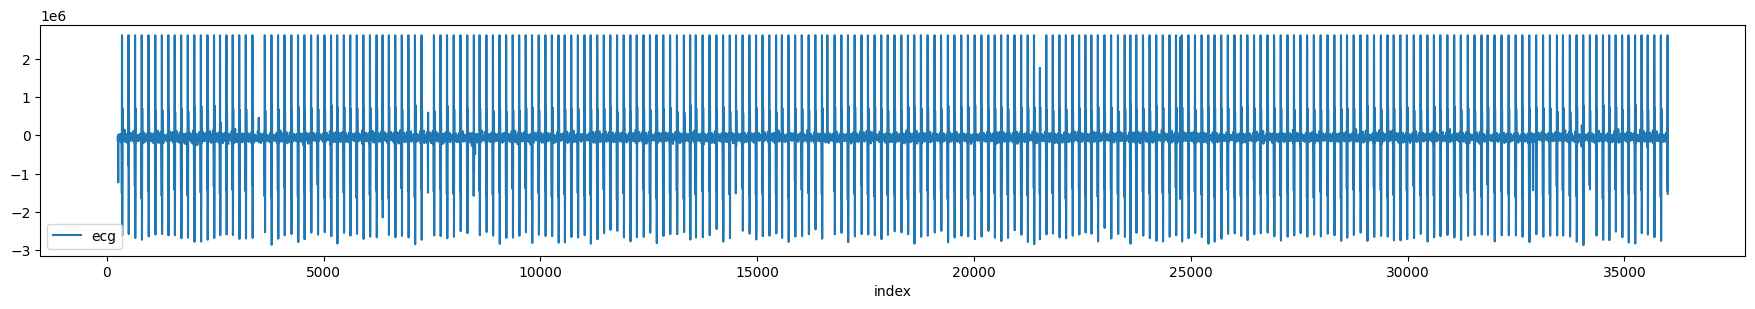

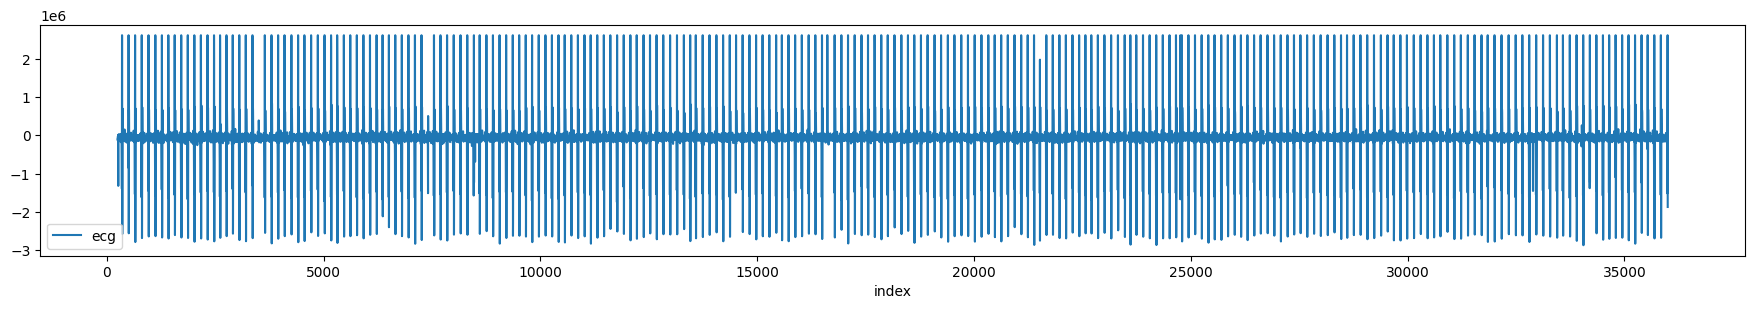

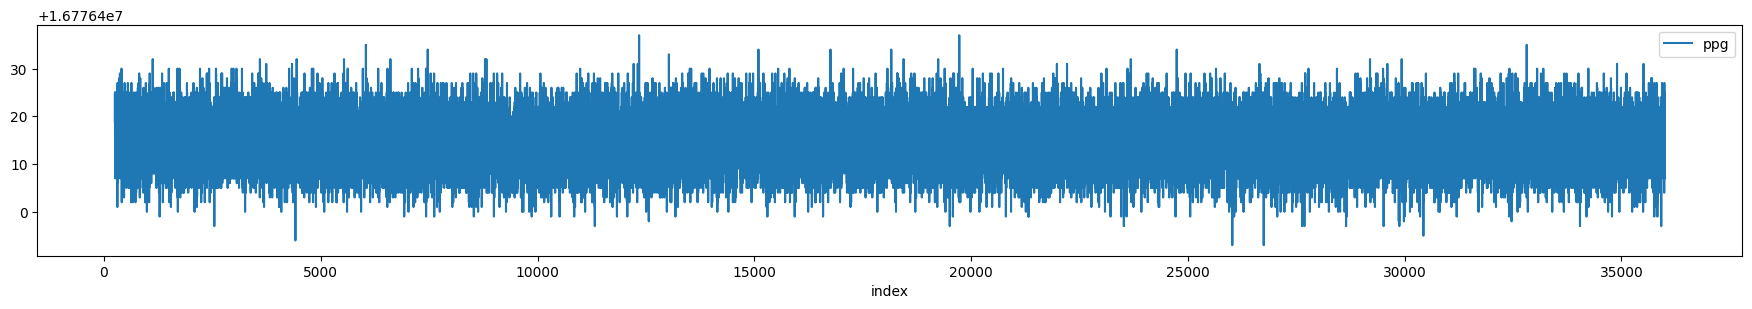

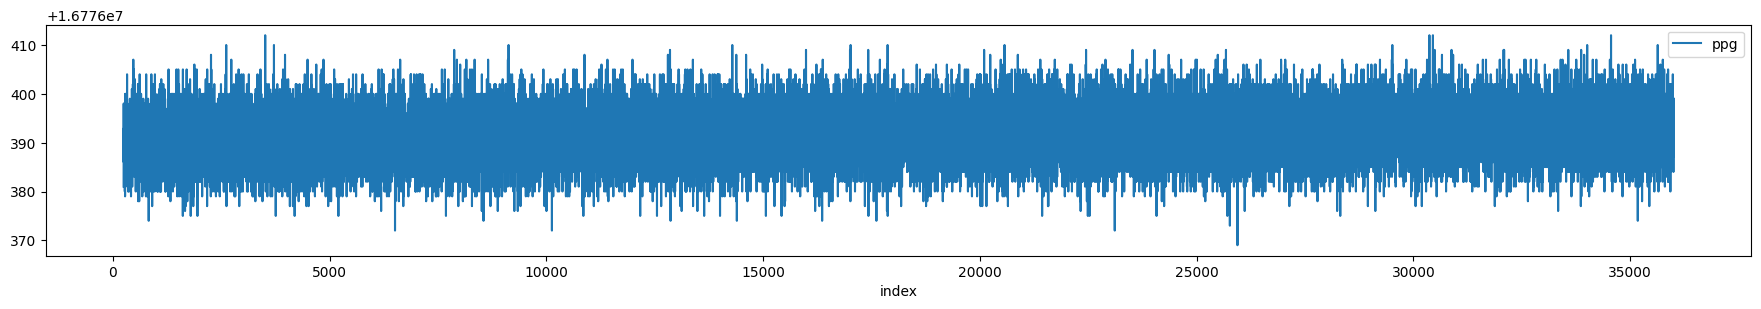

In [108]:
# Draw the acceleration signal of the left and right sides
left_data.plot(x="index", y=["acc_x", "acc_y", "acc_z"], figsize=(22, 3))
right_data.plot(x="index", y=["acc_x", "acc_y", "acc_z"], figsize=(22, 3))

# Draw the ECG of the left and right sides
left_data.plot(x="index", y=["ecg"], figsize=(22, 3))
right_data.plot(x="index", y=["ecg"], figsize=(22, 3))

# Draw the PPG of the left and right sides in case of hp3
if extension == "hp3":
  left_data.plot(x="index", y=["ppg"], figsize=(22, 3))
  right_data.plot(x="index", y=["ppg"], figsize=(22, 3))

# **Remove the Drift in the Acceleration Signal of the Left Side and Draw the Signal Before and After**

,index,time,side,acc_x,acc_y,acc_z,ppg,ecg,trend_x,new_acc_x,trend_y,new_acc_y,trend_z,new_acc_z
0,252,00:00:00.004000,L,0.126298,-0.101215,0.038709,16776419.0,-134806.0,NaN,NaN,NaN,NaN,NaN,NaN
1,253,00:00:00.012000,L,0.125942,-0.100518,0.038802,16776425.0,-125262.0,NaN,NaN,NaN,NaN,NaN,NaN
2,254,00:00:00.020000,L,0.126459,-0.100512,0.039283,16776425.0,-83849.0,NaN,NaN,NaN,NaN,NaN,NaN
3,255,00:00:00.028000,L,0.126124,-0.101426,0.038952,16776414.0,-18552.0,NaN,NaN,NaN,NaN,NaN,NaN
4,256,00:00:00.036000,L,0.126546,-0.101077,0.038855,16776419.0,-74361.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35744,35996,00:04:45.956000,L,0.126860,-0.103555,0.035057,16776413.0,2622194.0,0.127054,-0.000194,-0.101021,-0.002533,0.034435,0.000622
35745,35997,00:04:45.964000,L,0.127176,-0.103630,0.035535,16776424.0,2622176.0,0.127063,0.000113,-0.101057,-0.002572,0.034451,0.001084
35746,35998,00:04:45.972000,L,0.126833,-0.103701,0.034598,16776413.0,1861212.0,0.127062,-0.000229,-0.101090,-0.002612,0.034452,0.000146
35747,35999,00:04:45.980000,L,0.126905,-0.103327,0.036284,16776407.0,-319993.0,0.127061,-0.000156,-0.101116,-0.002210,0.034468,0.001816


x-axis before and after


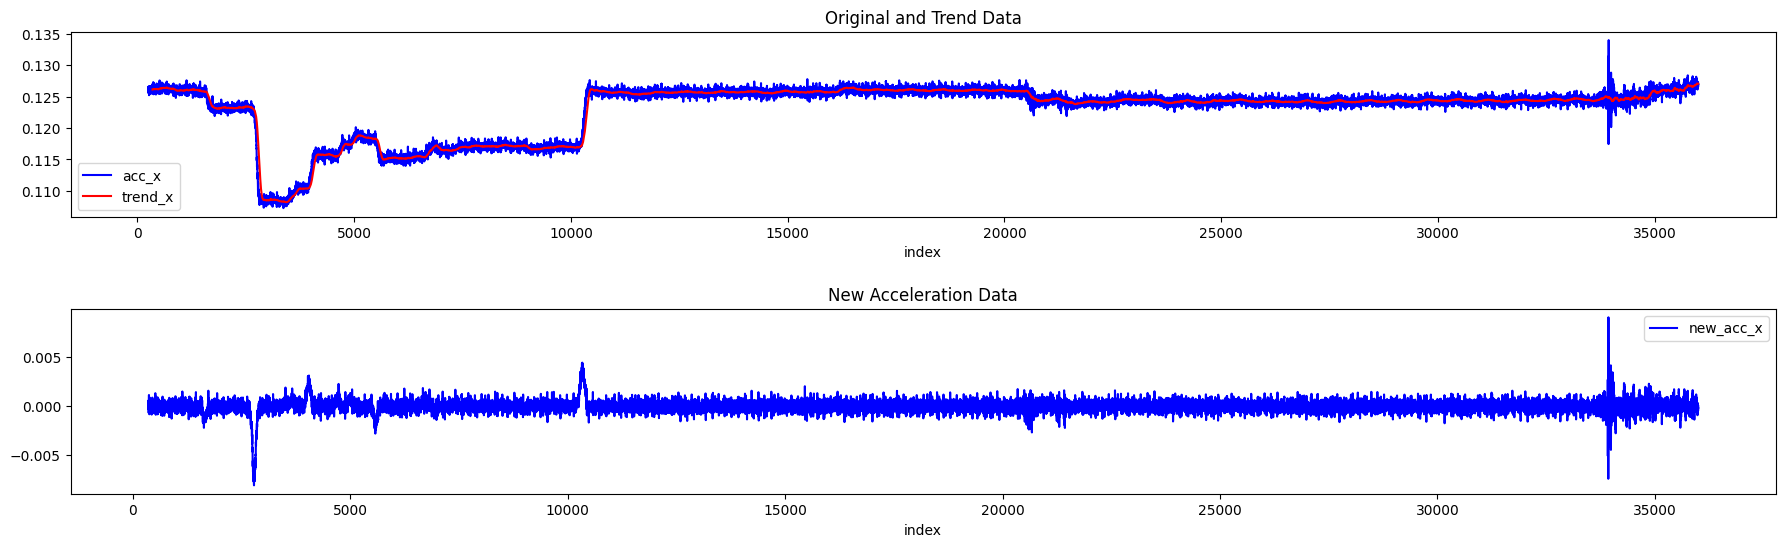

y-axis before and after


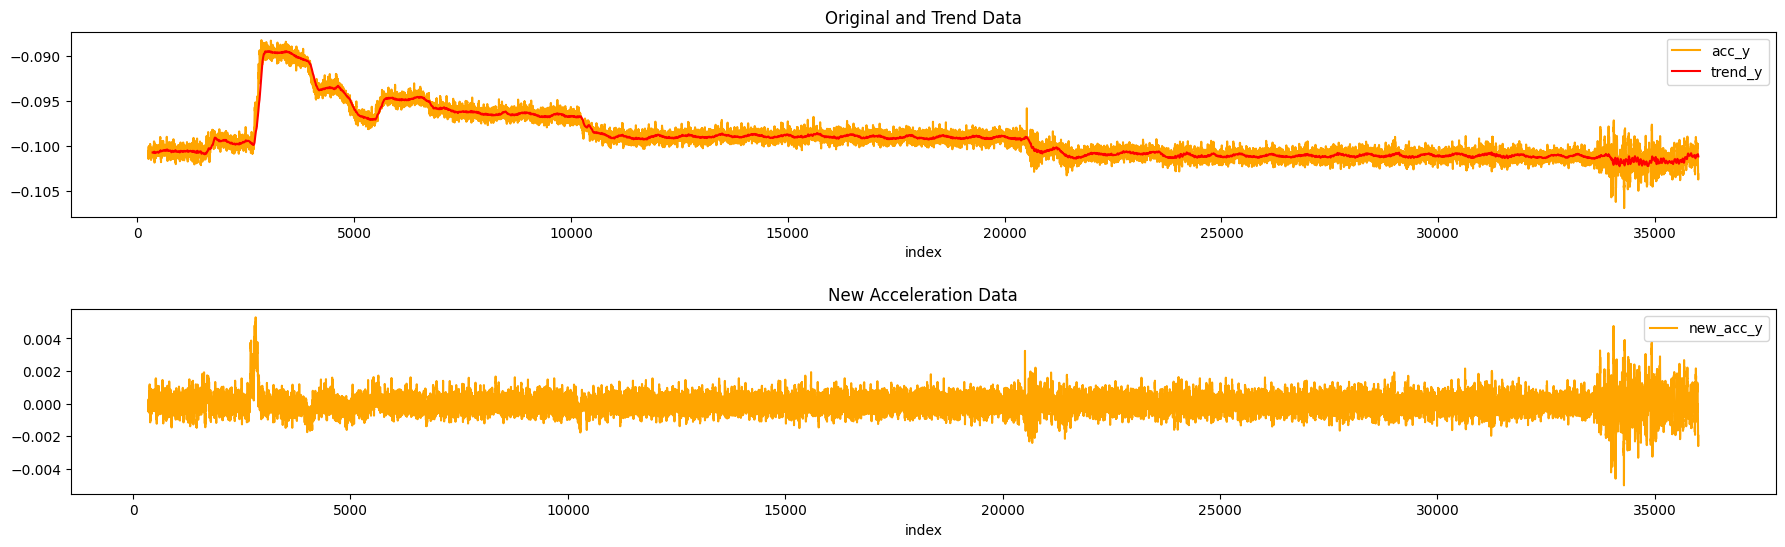

z-axis before and after


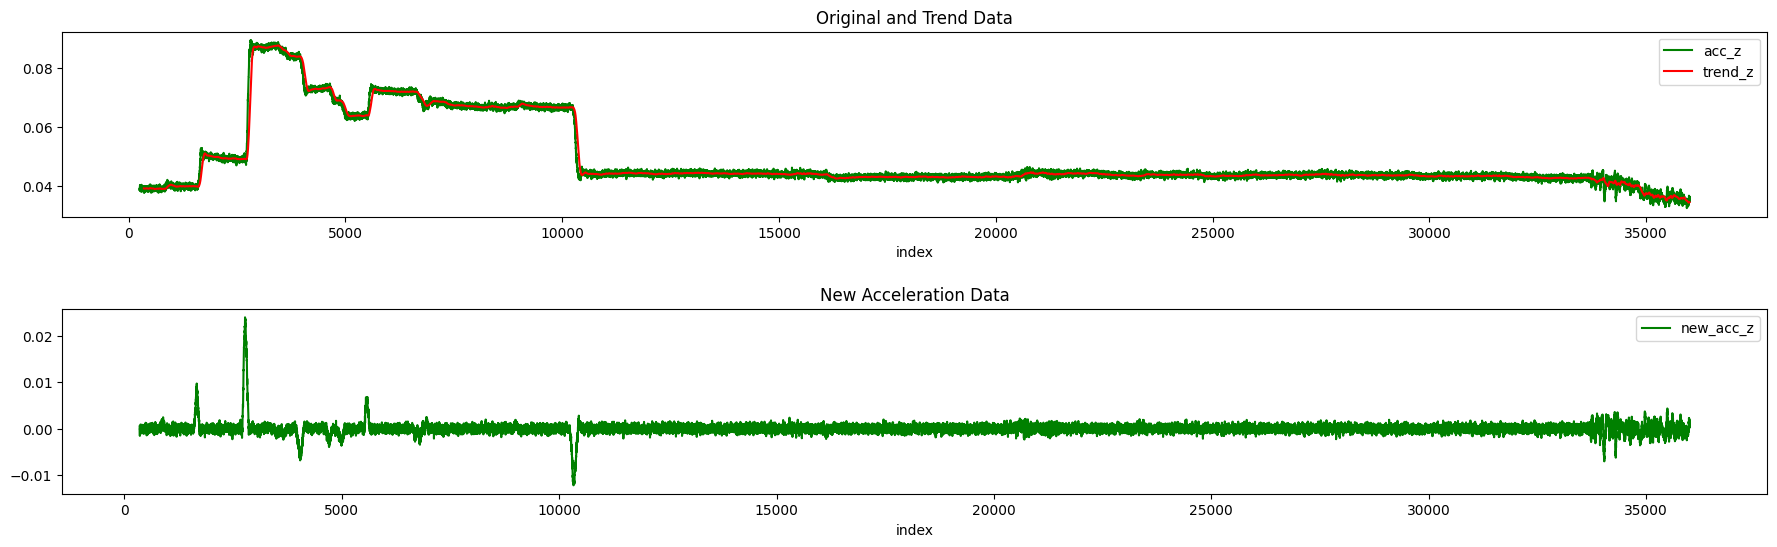

In [109]:
# Acceleration Signal on the Left side

# Remove the drift in the acceleration signal of the left side
left_data_no_drift = hp_remove_drift(left_data, extension, base=100) #base is number of data points used in each rolling window to compute the mean.

# Display the data after removing the drift
display(left_data_no_drift)

# Draw the signal before and after removing the drift for the left side
draw_drift(left_data_no_drift)


,index,time,side,acc_x,acc_y,acc_z,ppg,ecg,trend_x,new_acc_x,trend_y,new_acc_y,trend_z,new_acc_z
0,251,00:00:00,R,0.122135,0.095760,0.046530,16776381.0,-107161.0,NaN,NaN,NaN,NaN,NaN,NaN
1,252,00:00:00.008000,R,0.121962,0.095923,0.047582,16776389.0,-130599.0,NaN,NaN,NaN,NaN,NaN,NaN
2,253,00:00:00.016000,R,0.122511,0.095472,0.046868,16776398.0,-115873.0,NaN,NaN,NaN,NaN,NaN,NaN
3,254,00:00:00.024000,R,0.122093,0.095654,0.046693,16776387.0,-73223.0,NaN,NaN,NaN,NaN,NaN,NaN
4,255,00:00:00.032000,R,0.121918,0.095599,0.047653,16776386.0,-26287.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35745,35996,00:04:45.960000,R,0.119930,0.095545,0.048459,16776384.0,2622649.0,0.120417,-0.000487,0.095530,0.000016,0.050203,-0.001744
35746,35997,00:04:45.968000,R,0.119956,0.095575,0.048024,16776392.0,2622777.0,0.120411,-0.000454,0.095532,0.000043,0.050177,-0.002153
35747,35998,00:04:45.976000,R,0.119487,0.095364,0.049709,16776399.0,1342598.0,0.120401,-0.000914,0.095528,-0.000164,0.050164,-0.000455
35748,35999,00:04:45.984000,R,0.119425,0.095610,0.049395,16776389.0,-803057.0,0.120395,-0.000970,0.095527,0.000083,0.050150,-0.000755


x-axis before and after


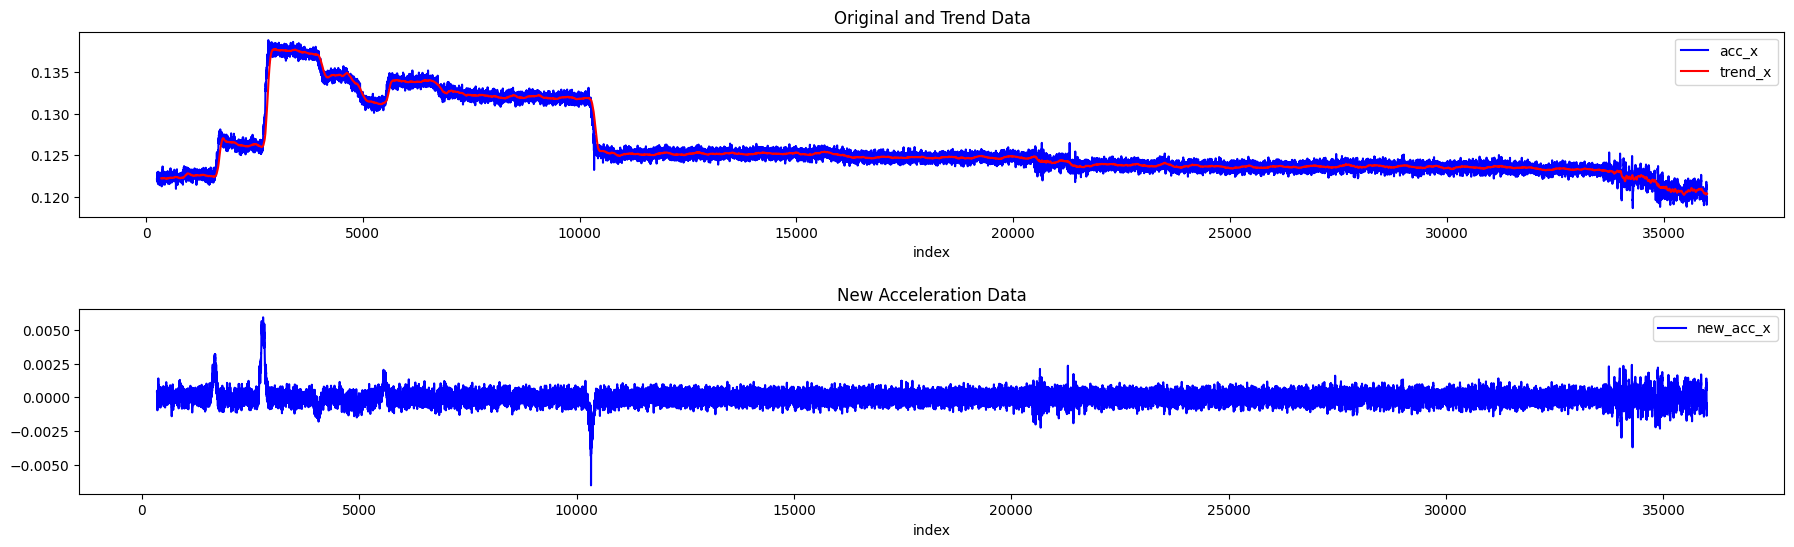

y-axis before and after


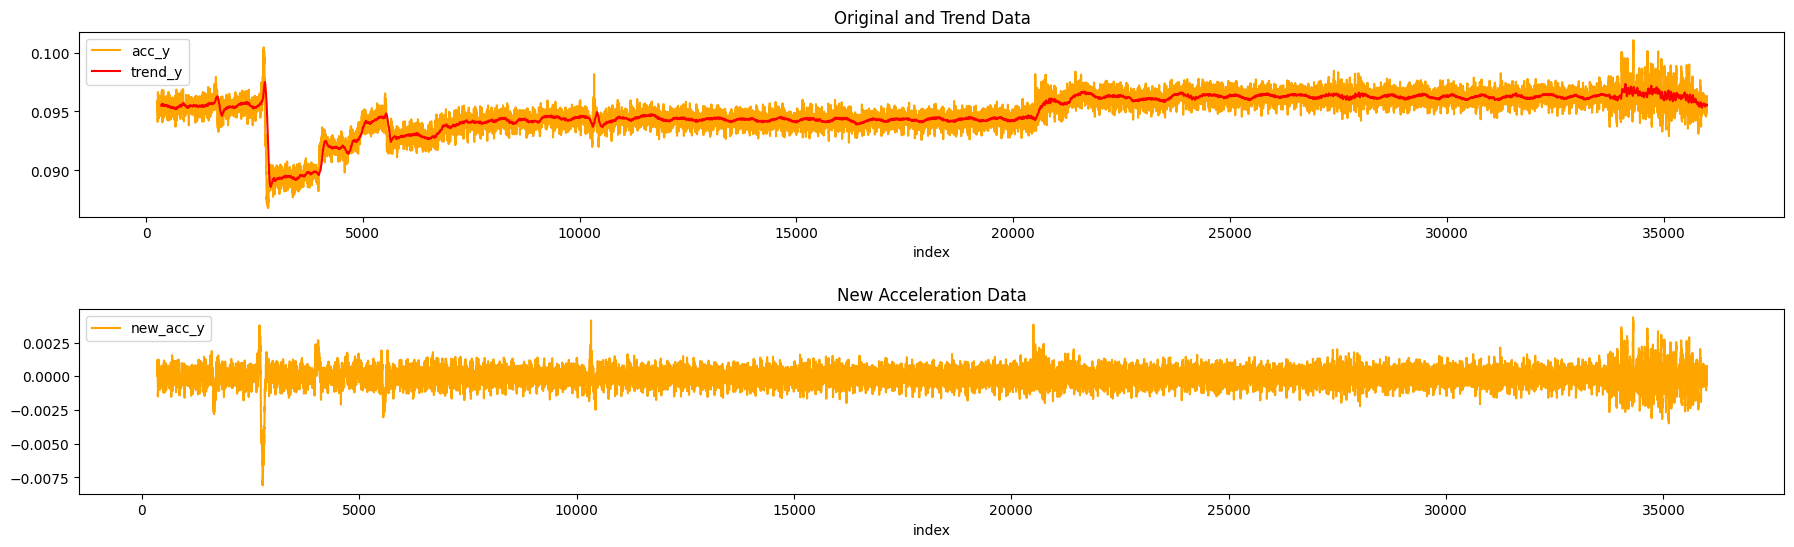

z-axis before and after


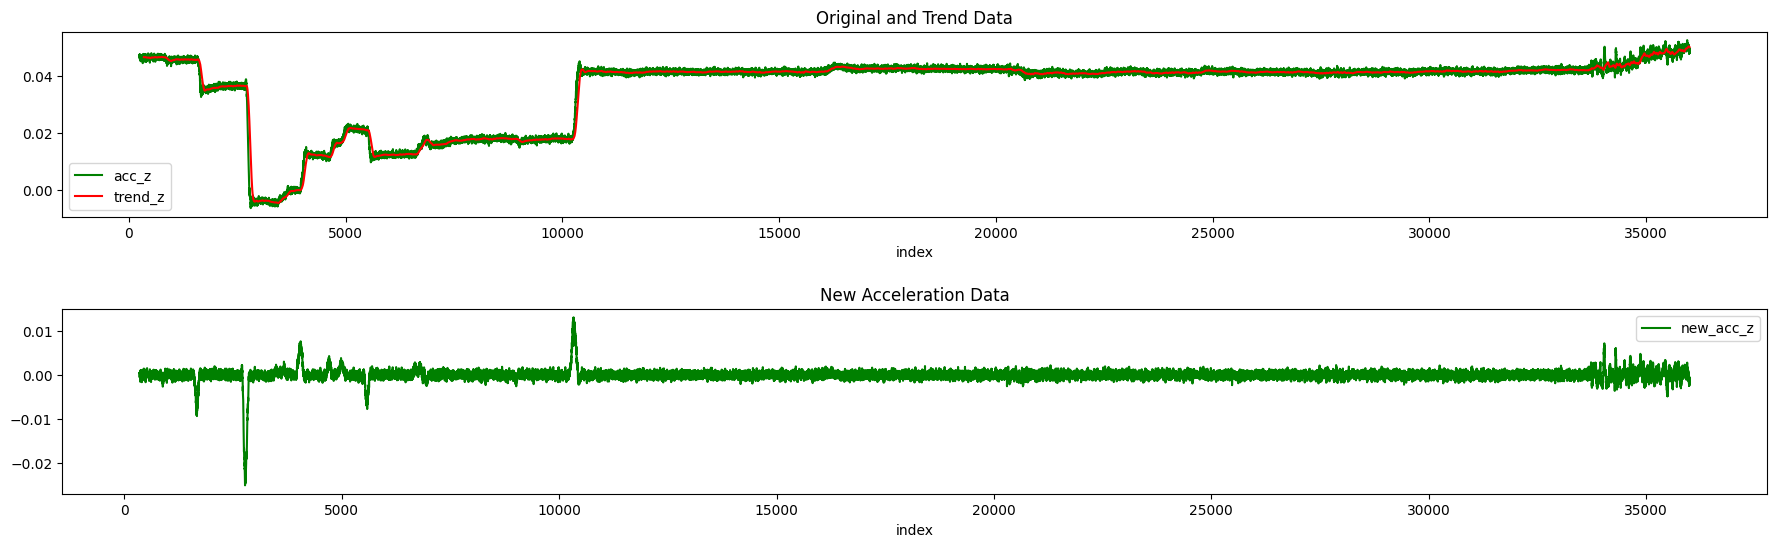

In [110]:
# Acceleration Signal on the Right side
# Remove the drift in the acceleration signal of the right side
right_data_no_drift = hp_remove_drift(right_data, extension, base=100) #base is number of data points used in each rolling window to compute the mean.

# Display the data after removing the drift
display(right_data_no_drift)

# Draw the signal before and after removing the drift for the right side
draw_drift(right_data_no_drift)